# Problem Statement: Image Classification

In [ ]:
# Here I have created a 5 layer CNN model to classify different images into four categories:
(i)Attire
(ii)Decoration and Signage 
(iii)Food
(iv)Misc 

In [1]:
#Importing the required packages

In [2]:
#Importing TensorFlow as Keras uses tensorflow backend
import tensorflow as tf

#Importing pandas for data processing
import pandas as pd

#To perform numerical operations
import numpy as np

#Importing Keras for building the required classification model
import keras

#For applying transformation and scaling the data
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
#For visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importing the train dataset
data = pd.read_csv("train.csv")

In [5]:
#Viewing the contents of the training dataset
data.head()

,Image,Class
0,image7042.jpg,Food
1,image3327.jpg,misc
2,image10335.jpg,Attire
3,image8019.jpg,Food
4,image2128.jpg,Attire


# Visualizing the data using one image from the train dataset

In [7]:
test_image = image.load_img('C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\CAW studios\\train_images\\image16.jpg',target_size=(150,150,3))

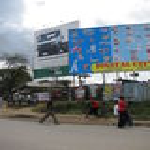

In [8]:
test_image

In [9]:
#Mapping the corresponding label of the test image used above

In [10]:
data.query("Image=='image16.jpg'")["Class"]

733    Decorationandsignage
Name: Class, dtype: object

# Function to read, load and convert the images into number so that we can build the model using the same

In [12]:
#Tqdm is used to represent the progress of the our loop in a quantitative way
from tqdm import tqdm

In [77]:
xtrain=[]
ytrain=[]
counter=0
for i in tqdm(data['Image']):
    try:
        path = 'C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\CAW studios\\train_images\\'+str(i)
        load_image=image.load_img(path,target_size=(50,50))
        converted_image=image.img_to_array(load_image)
        xtrain.append(converted_image)
        ytrain.append(data['Class'][counter])
        counter=counter+1
    except:
        counter= counter+1
        continue

100%|████████████████████████████████████████████████████████████████████████████| 5983/5983 [00:03<00:00, 1831.35it/s]


# Exploratory Data Analysis

In [15]:
#No of images used for training
len(xtrain)

5000

In [16]:
len(ytrain)

5000

In [88]:
xtrain = np.array(xtrain)

In [18]:
#There are 5000 images in the training dataset and shape of each image is (50*50*3) where 3 represents number of channels(Since it is a colour image the channel value here is 3)

In [89]:
xtrain.shape

(5000, 50, 50, 3)

In [69]:
#The columns name of this dataframe are the different classes 
labels = pd.get_dummies(ytrain)
labels.head()

,Attire,Decorationandsignage,Food,misc
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [90]:
ytrain = np.array(pd.get_dummies(ytrain))

In [22]:
#Loading and viewing the contents of the test dataset

In [23]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Image
0,image4703.jpg
1,image8371.jpg
2,image8308.jpg
3,image6299.jpg
4,image2364.jpg


In [24]:
#Function to read, load and convert the test images into number so that we can build the model using the same

In [25]:
xtest=[]
for i in tqdm(test_data['Image']):
    try:
        path = 'C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\CAW studios\\test_images\\Test\\'+str(i)
        loaded_image=image.load_img(path,target_size=(50,50))
        converted_image=image.img_to_array(loaded_image)
        xtest.append(converted_image)
    except:
        continue

100%|██████████████████████████████████████████████████████████████████████████████| 983/983 [00:00<00:00, 1413.22it/s]


In [26]:
#No of images in our test data set
len(xtest)

983

In [27]:
xtest = np.array(xtest)

In [28]:
xtest.shape

(983, 50, 50, 3)

# Creating a CNN model

In [30]:
#We are using a Sequential model for creating a CNN model as it help us to easily stack or add layers in order from input to output 
from keras.models import Sequential

#Convolution and MaxPooling for feature extraction
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D

#Dense - for creating a fully connected ANN
from keras.layers import Dense

#Flatten - To convert the tensor or matrix into single dimension or single row
from keras.layers import Flatten

#Dropout - To overcome the problem the problem of overfitting
from keras.layers import Dropout

In [31]:
#Normalizing the train and test dataset

In [32]:
xtrain = xtrain/255.0

In [33]:
xtest = xtest/255.0

In [34]:
## Instantiating the model for CNN
my_model = Sequential()

In [35]:
##Adding a convolutional layer with argments(no of filters 32, filter or kernel size = (3,3), input_shape of the image(50,50,3) as it a colour image), activation function as relu) 
my_model.add(Conv2D(32,(3,3),input_shape = (50,50,3),activation = 'relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [36]:
## Add a Pooling layer. Pooling is then used to reduce the spatial dimensions of the output of the Conv2d layer by considering the max value in each kernel or window.
my_model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
## Adding an another Convolutional and Pooling layer
my_model.add(Conv2D(64,(3,3),activation = 'relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
## Adding an another Convolutional and Pooling layer
my_model.add(Conv2D(64,(3,3),activation = 'relu'))
my_model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
##Adding a Flatten layer to flatten out the output of the convolution layers.
my_model.add(Flatten())

In [40]:
##Creating a fully connected artificial neural network by adding Dense layers. In this model, we have 5 layers (three convolution layers , one hidden dense layer and one output layer. 
my_model.add(Dense(units = 64,activation = 'relu'))

In [41]:
#Add an other dense (output) layer.In the output layer, the number of neurons should be equal to the number of classes in our data. The activation function used is softmax as it is a multi-class classification.
my_model.add(Dense(units = 4,activation = 'softmax'))

In [42]:
## Here we are compliling our model using appropriate optimizer(I have used adam in this case), defining loss function(categorical_crossentropy as it is a multi-class classifier), metrics(I have used accuracy as a performance measure) 
my_model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [43]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [46]:
xtrain.shape

(5000, 50, 50, 3)

# Fitting the model on the training dataset and training it

In [51]:
my_model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.1297 - accuracy: 0.9628
Epoch 2/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0879 - accuracy: 0.9778
Epoch 3/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.1236 - accuracy: 0.9604
Epoch 4/10
5000/5000 [==============================] - 39s 8ms/step - loss: 0.0861 - accuracy: 0.9752
Epoch 5/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0636 - accuracy: 0.9842
Epoch 6/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0947 - accuracy: 0.9752
Epoch 7/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.1126 - accuracy: 0.9644
Epoch 8/10
5000/5000 [==============================] - 38s 8ms/step - loss: 0.0896 - accuracy: 0.9700
Epoch 9/10
5000/5000 [==============================] - 44s 9ms/step - loss: 0.0797 - accuracy: 0.9782
Epoch 10/10
5000/5000 [==============================] - 43s 9ms/step - l

In [53]:
#Using the trained model to predict the output of the test dataset
predict = my_model.predict(xtest)

In [54]:
#Using argmax function to return the class of the observation where the probability value is the maximum
sess = tf.Session()
result = sess.run(tf.argmax(predict,1))

In [55]:
result

array([2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1, 3, 0, 2, 1, 3, 0, 3, 0,
       2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 1, 0, 0, 0, 2, 1,
       2, 0, 2, 1, 0, 3, 3, 2, 2, 3, 3, 2, 3, 0, 0, 2, 3, 0, 2, 2, 3, 1,
       2, 0, 2, 2, 0, 2, 0, 1, 3, 2, 0, 0, 2, 3, 2, 3, 1, 0, 0, 1, 2, 3,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 3, 3, 3, 0, 2, 2, 3, 2, 2, 1, 2, 1, 0, 2, 2, 0, 3, 0, 3,
       0, 0, 2, 2, 0, 0, 0, 3, 3, 2, 3, 2, 2, 2, 0, 3, 1, 2, 0, 0, 3, 1,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 0, 2, 3, 0, 2, 0, 2, 0, 2,
       2, 2, 3, 2, 2, 0, 3, 1, 3, 0, 2, 1, 3, 3, 1, 0, 0, 2, 2, 3, 2, 2,
       2, 3, 2, 3, 0, 2, 0, 2, 3, 0, 0, 3, 2, 1, 2, 0, 2, 0, 3, 0, 0, 0,
       0, 3, 0, 2, 0, 0, 2, 2, 3, 3, 1, 2, 3, 1, 2, 3, 2, 2, 0, 3, 3, 3,
       2, 2, 1, 2, 2, 0, 3, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0,
       1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 3, 3, 3, 2, 2, 1,
       2, 0, 2, 2, 2, 0, 0, 3, 0, 2, 1, 2, 2, 2, 0,

In [56]:
len(result)

983

In [57]:
#Running an inference using a single test image which has not been used for train or testing to check if the model is predicting correctly.
test_image = image.load_img('C:\\Users\\Alwin\\Desktop\\Batch-7-Python Demos\\AI\\Class\\Pizza\\inference\\good2.jpg',target_size=(50,50,3))

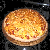

In [58]:
test_image

In [59]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [60]:
test_image.shape

(50, 50, 3)

In [61]:
#The model expects the data to be a 4 dimensional image, hence reshaping the test image.
test_image = test_image.reshape(1,50,50,3)

In [74]:
#Using the trained model to predict the outcome.
result_inference =my_model.predict(test_image)
result_inference

array([[0., 0., 1., 0.]], dtype=float32)

In [75]:
result_inference = sess.run(tf.argmax(result_inference,1))
result_inference

array([2], dtype=int64)

In [66]:
labels.columns

Index(['Attire', 'Decorationandsignage', 'Food', 'misc'], dtype='object')

In [76]:
if (result_inference == 0):
    print("The image is of Attire class")
elif (result_inference == 1):
    print("The image is of Decoration and Signage class")
elif (result_inference == 2):
    print("The image is of Food class")
else:
    print("The image is of Misc class")

The image is of Food class


In [ ]:
#Saving the result as required for the submission

In [78]:
final_result = []
for i in result:
    if (i == 0):
        final_result.append('Attire')
    elif (i == 1):
        final_result.append('Decorationandsignage')
    elif (i == 2):
        final_result.append('Food')
    else:
        final_result.append('misc')

In [79]:
test_data['Class'] = final_result

In [ ]:
#Saving the output to the file submission.csv

In [80]:
test_data.to_csv("submission.csv")

In [ ]:
#Transfer Learning - Using VGG16 pretrained model for the same task

In [95]:
IMAGE_SIZE = 50
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

In [96]:
base_model = keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

In [97]:
base_model.trainable = False

In [98]:
# Trainable classification head
maxpool_layer = keras.layers.GlobalMaxPooling2D()
prediction_layer = keras.layers.Dense(4, activation='softmax')

In [99]:
classifier = keras.Sequential([
    base_model,
    maxpool_layer,
    prediction_layer
])

In [100]:
classifier.compile(optimizer=keras.optimizers.Adam(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [102]:
classifier.fit(xtrain,ytrain,epochs = 5)

Epoch 1/5
5000/5000 [==============================] - 275s 55ms/step - loss: 1.5802 - accuracy: 0.6120
Epoch 2/5
5000/5000 [==============================] - 274s 55ms/step - loss: 1.4384 - accuracy: 0.6168
Epoch 3/5
5000/5000 [==============================] - 284s 57ms/step - loss: 1.3280 - accuracy: 0.6178
Epoch 4/5
5000/5000 [==============================] - 300s 60ms/step - loss: 1.2640 - accuracy: 0.6172
Epoch 5/5
5000/5000 [==============================] - 309s 62ms/step - loss: 1.2274 - accuracy: 0.6174


In [104]:
classifier.fit(xtrain,ytrain,epochs = 5,batch_size=50)

Epoch 1/5
5000/5000 [==============================] - 273s 55ms/step - loss: 1.0023 - accuracy: 0.6422
Epoch 2/5
5000/5000 [==============================] - 272s 54ms/step - loss: 0.9898 - accuracy: 0.6366
Epoch 3/5
5000/5000 [==============================] - 272s 54ms/step - loss: 0.9844 - accuracy: 0.6422
Epoch 4/5
5000/5000 [==============================] - 272s 54ms/step - loss: 0.9913 - accuracy: 0.6410
Epoch 5/5
5000/5000 [==============================] - 273s 55ms/step - loss: 0.9808 - accuracy: 0.6434


In [106]:
predict = classifier.predict(xtest)

In [108]:
result = sess.run(tf.argmax(predict,1))

In [109]:
result

array([3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 0, 3, 0, 3, 2, 0, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 0, 3, 3, 0,
       2, 3, 0, 2, 2, 3, 0, 2, 0, 0, 3, 2, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 0, 3,
       0, 2, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 2, 3, 2, 3, 2, 3, 3, 2, 3,
       0, 0, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 3, 2, 3, 3, 3, 3, 3,
       2, 0, 0, 2, 0, 2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3,
       0, 3, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 2, 3,
       3, 3, 3, 3, 3, 2, 3, 2, 3, 0, 3, 2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 1, 3, 3, 0, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [ ]:
##Since the results were better for custom CNN, considering the result of the custom CNN as the final model